In [1]:
!pip install tf-keras-vis

You should consider upgrading via the '/work/06850/sbansal6/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
import sys
sys.path.append('../defacing')
from helpers.utils import load_vol
from dataloaders.inference_dataloader import DataGeneratoronFly
from models.modelN import Submodel

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import tensorflow as tf

In [3]:
root_path = '/work/06850/sbansal6/maverick2/mriqc-shared/experiment_faced_refaced/exp_face_refaced/model_save_dir_F15_3DS/train_test_fold_1/weights'
mode = 'sagittal'

In [4]:
#from keras.utils.generic_utils import CustomObjectScope
from matplotlib import cm
import os
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize


def get_cam(volume, mode='axial'):
    
    dataloader_params = {
            "conform_size": (64, 64, 64),
            "conform_zoom": (4., 4., 4.), 
            "nchannels": 1, 
            "nruns": 8,
            "nsamples": 8,
            "save": False, 
            "transform": None
        }
    
    datagenerator = DataGeneratoronFly(**dataloader_params)
    slices = datagenerator.get_data(volume)
    slices = np.transpose(np.array(slices),axes=[1, 0, 2, 3, 4])
    ds = {}
    ds['axial'] = slices[0]
    ds['coronal'] = slices[1]
    ds['sagittal'] = slices[2]
    
    model = modelN.Submodel(input_shape=(64, 64),
                    name=mode,
                    weights=mode,
                    root_path=root_path,
                    include_top=True,
                    trainable=False)

    score = np.squeeze(model.predict(ds[mode][0][None,...]))
    print(score)
    
    def model_modifier(m):
        m.layers[-1].activation = tf.keras.activations.linear

    # Create Gradcam object
    gradcam = Gradcam(model, model_modifier)

    # Generate heatmap with GradCAM
    cam = gradcam(lambda x: 1-x, ds[mode])
    cam = normalize(cam)
    return ds[mode], cam

In [5]:
faced_path = '../../missclassified/sub-11_T1w.nii.gz'

[62. 62. 62.]
0.00018763384


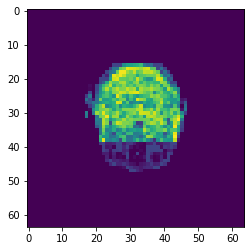

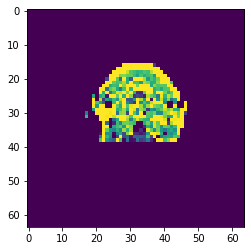

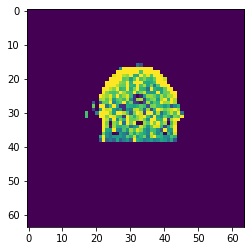

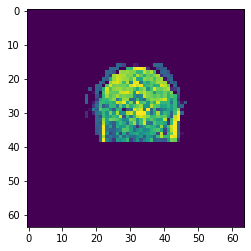

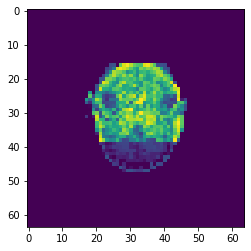

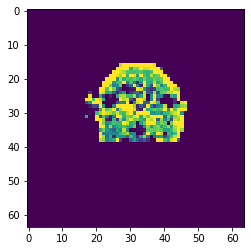

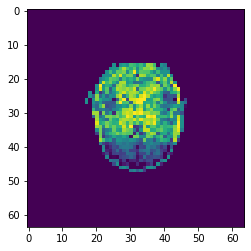

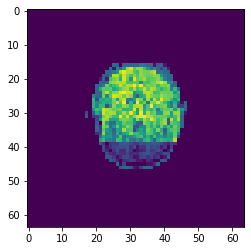

In [19]:
volume, _, _ = load_vol(faced_path)
imgs, cam = get_cam(volume, mode)
for i in range(cam.shape[0]):
    plt.imshow(np.rot90(imgs[i,:,:,0], 2))
    plt.imshow(np.rot90(cam[i],2), cmap='jet', alpha=0.5)
    plt.show()

In [6]:
defaced_path = '../sample_vols/defaced/example1.nii.gz'
volume, _, _ = load_vol(defaced_path)
imgs, cam = get_cam(volume, 'axial')
for i in range(cam.shape[0]):
    plt.imshow(np.rot90(imgs[i,:,:,0], 2))
    plt.imshow(np.rot90(cam[i],2), cmap='jet', alpha=0.5)
    plt.show()

[-2.  -2.  43.5]


NameError: name 'modelN' is not defined